In [178]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import gridspec
import pandas as pd
import seaborn as sns
import missingno
import lasio

pd.options.mode.chained_assignment = None
plt.style.use('seaborn-whitegrid')

## Exploratoring the dataset


This stage is an open-ended process where we calculate statistics and make figures to find trends, missing values, outliers, anomalies, patterns, or relationships within the data.







In [179]:
df = pd.read_csv('data.csv').iloc[:, 1:]
df.head()

,BS,CALI,DCAL,DEPTH,DRHO,DT,DTC,DTE,GR,Lithology,NPHI,PEF,RDEP,RHOB,RMED,RSHA,RXO,SGR,SP,WELL
0,NaN,19.406000,NaN,493.493134,-0.708,NaN,167.582153,50815100.0,64.497482,NaN,NaN,NaN,1.574993,1.789,1.546029,1.546029,NaN,NaN,0.694700,15/9-12
1,NaN,19.406000,NaN,493.645538,-0.722,NaN,167.425064,50761636.0,62.406261,NaN,NaN,NaN,1.569011,1.754,1.570030,1.570030,NaN,NaN,0.445339,15/9-12
2,NaN,19.406000,NaN,493.797943,-0.620,NaN,167.808395,50886056.0,62.629055,NaN,NaN,NaN,1.578010,1.778,1.594994,1.594994,NaN,NaN,0.727901,15/9-12
3,NaN,19.452999,NaN,493.950348,-0.648,NaN,169.244873,51314492.0,65.998596,NaN,NaN,NaN,1.586024,1.642,1.589930,1.589930,NaN,NaN,1.474898,15/9-12
4,NaN,19.452999,NaN,494.102722,-0.685,NaN,170.635086,51763464.0,64.997223,NaN,NaN,NaN,1.603011,1.563,1.540016,1.540016,NaN,NaN,-0.023000,15/9-12


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146724 entries, 0 to 146723
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BS         39970 non-null   float64
 1   CALI       145968 non-null  float64
 2   DCAL       62680 non-null   float64
 3   DEPTH      146724 non-null  float64
 4   DRHO       142879 non-null  float64
 5   DT         63327 non-null   float64
 6   DTC        145965 non-null  float64
 7   DTE        128196 non-null  float64
 8   GR         146671 non-null  float64
 9   Lithology  59036 non-null   float64
 10  NPHI       107128 non-null  float64
 11  PEF        50930 non-null   float64
 12  RDEP       146634 non-null  float64
 13  RHOB       143541 non-null  float64
 14  RMED       146603 non-null  float64
 15  RSHA       142452 non-null  float64
 16  RXO        59531 non-null   float64
 17  SGR        17373 non-null   float64
 18  SP         146714 non-null  float64
 19  WELL       146724 non-n

In [181]:
df.shape

(146724, 20)

In [182]:
df['WELL'].unique()

array(['15/9-12', '15/9-13', '15/9-15', '15/9-17', '15/9-18', '15/9-7',
       '15/9-8'], dtype=object)

In [183]:
df.isnull().sum()

BS           106754
CALI            756
DCAL          84044
DEPTH             0
DRHO           3845
DT            83397
DTC             759
DTE           18528
GR               53
Lithology     87688
NPHI          39596
PEF           95794
RDEP             90
RHOB           3183
RMED            121
RSHA           4272
RXO           87193
SGR          129351
SP               10
WELL              0
dtype: int64

<AxesSubplot:>

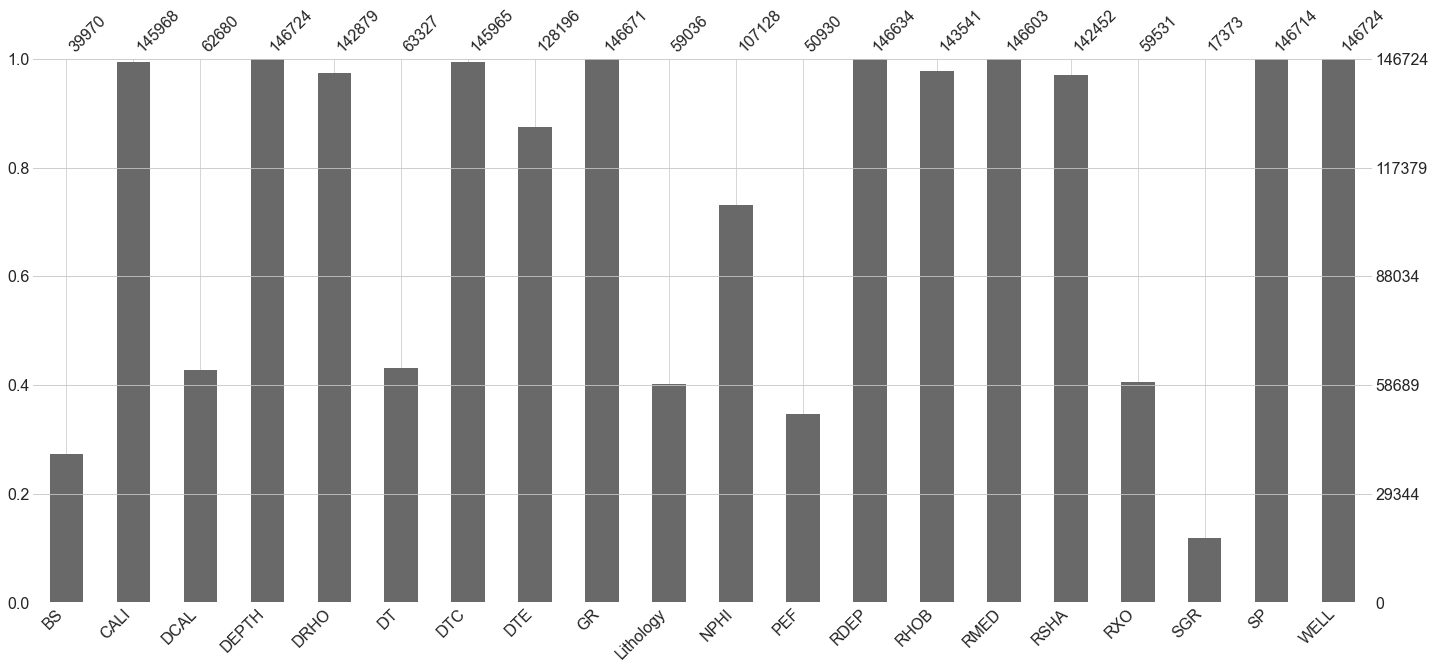

In [184]:
missingno.bar(df)

Visualizing the log coverage on each well

In [185]:
data_nan = df[['WELL','DEPTH','BS', 'CALI', 'RHOB', 'DTC', 'Lithology', 'GR',
            'NPHI', 'RDEP', 'SP']].copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works
grouped = data_nan.groupby('WELL')

BS 0
CALI 1
RHOB 2
DTC 3
Lithology 4
GR 5
NPHI 6
RDEP 7
SP 8


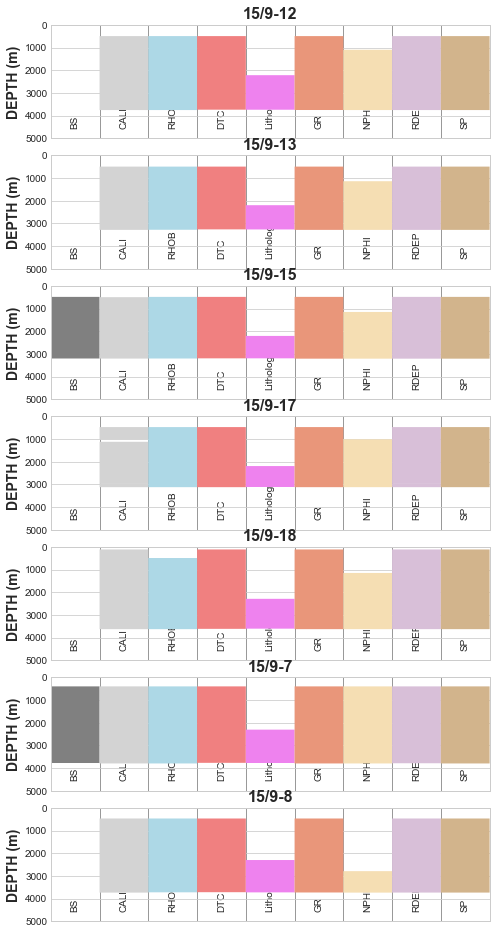

In [186]:
#Setup the labels we want to display on the x-axis
labels = data_nan.columns[2:]

#Setup the figure and the subplots
fig, axs = plt.subplots(7, 1, figsize=(7,13))

#Loop through each well and column in the grouped dataframe
for (name, data), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,8)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(data.DEPTH, 0, data.BS, facecolor='grey')
    ax.fill_betweenx(data.DEPTH, 1, data.CALI, facecolor='lightgrey')
    ax.fill_betweenx(data.DEPTH, 2, data.RHOB, facecolor='lightblue')
    ax.fill_betweenx(data.DEPTH, 3, data.DTC, facecolor='lightcoral')
    ax.fill_betweenx(data.DEPTH, 4, data.Lithology, facecolor='violet')
    ax.fill_betweenx(data.DEPTH, 5, data.GR, facecolor='darksalmon')
    ax.fill_betweenx(data.DEPTH, 6, data.NPHI, facecolor='wheat')
    ax.fill_betweenx(data.DEPTH, 7, data.RDEP, facecolor='thistle')
    ax.fill_betweenx(data.DEPTH, 8, data.SP, facecolor='tan')
    


    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)


In [187]:
df.columns

Index(['BS', 'CALI', 'DCAL', 'DEPTH', 'DRHO', 'DT', 'DTC', 'DTE', 'GR',
       'Lithology', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RSHA', 'RXO',
       'SGR', 'SP', 'WELL'],
      dtype='object')

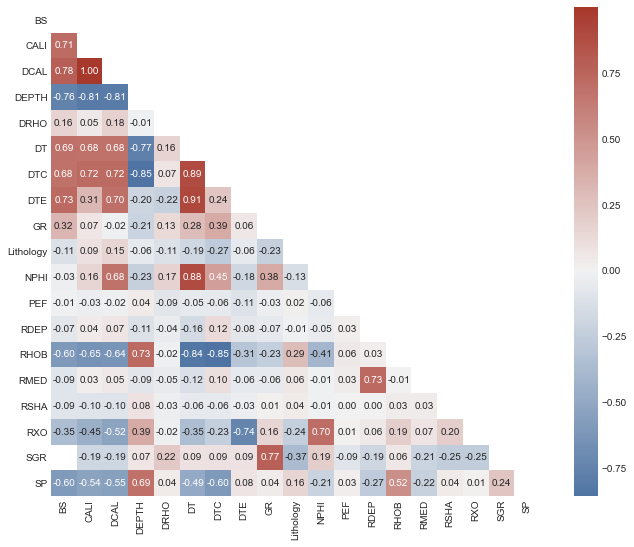

In [188]:
# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(12, 9))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

Based on the missing values and correlation chart we subset the columns.

In [189]:
df = df.drop(['BS','Lithology','DTE','DRHO','RMED','RSHA','SGR','RXO','DCAL','PEF','DT'],axis=1)
df.isnull().sum()

CALI       756
DEPTH        0
DTC        759
GR          53
NPHI     39596
RDEP        90
RHOB      3183
SP          10
WELL         0
dtype: int64

In [190]:
print(f'NPHI log has{(39596/len(df))*100: .2f}% missing values')

NPHI log has 26.99% missing values


Initial distribution of the well logs

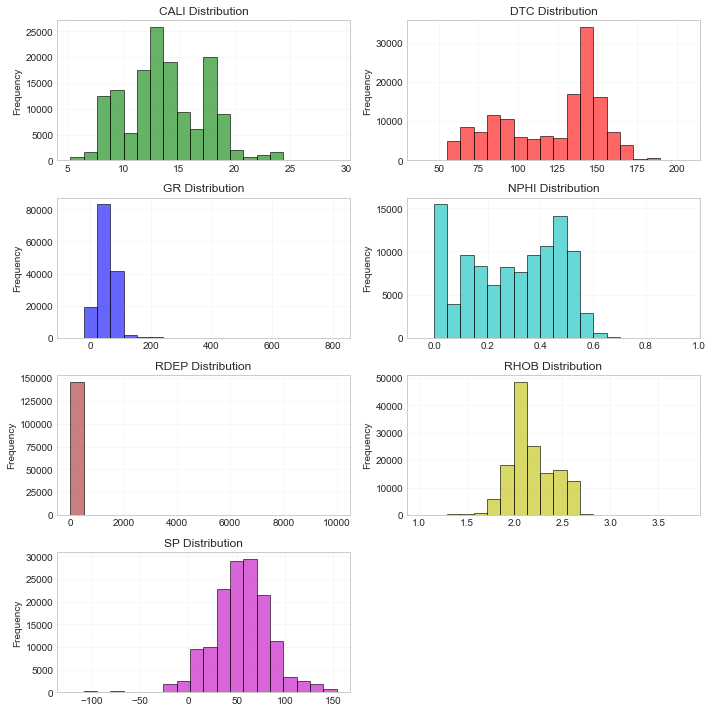

In [191]:
#Setup the number of rows and columns for our plot
rows = 4
cols = 2
colors = ['g','r','b','c','brown','y','m','grey','purple']
fig=plt.figure(figsize=(10,10))

for i, feature in enumerate(df.drop(['DEPTH','WELL'],axis=1)):
    ax=fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

In [192]:
df.describe()

,CALI,DEPTH,DTC,GR,NPHI,RDEP,RHOB,SP
count,145968.000000,146724.000000,145965.000000,146671.000000,107128.000000,146634.000000,143541.000000,146714.000000
mean,13.774084,1966.037197,121.590645,53.421138,0.289924,36.950399,2.176948,54.652728
std,3.574911,918.300800,31.480619,28.110916,0.180600,584.686445,0.228317,30.214147
min,5.261000,115.000000,38.432194,-64.813004,-0.055290,0.226000,1.018344,-122.164001
25%,11.820000,1183.425140,91.261299,31.971653,0.135313,0.773012,2.021334,36.926018
50%,13.433317,1957.763855,135.504364,54.500000,0.311635,1.239000,2.121483,55.755238
75%,16.677999,2732.121521,145.798187,69.713497,0.453115,2.014000,2.335994,73.199997
max,29.145000,3794.412598,206.286209,811.000000,0.954500,10000.000000,3.797000,153.257797


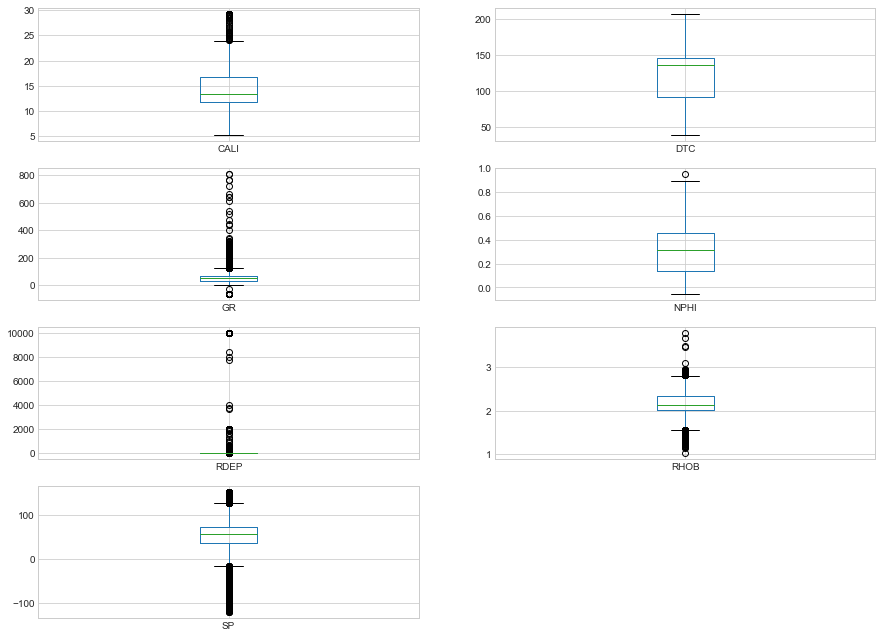

In [193]:
df.drop(['DEPTH','WELL'],axis=1).plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

# Feature engineering

In [194]:
blind_well = ['15/9-13','15/9-15']
test_data = df[df['WELL'].isin(blind_well)]
train_data = df[~df['WELL'].isin(blind_well)]

### Natural Log Transformation

Based on the EDA in original logs, we found that there are some logs that have non-normal distribution. This might decrease the performance of the algorithm in the latter stage. Therefore we decided to do a log transform on RDEP and RMED logs

In [195]:
# transform deep resistivity to logarithmic scale
train_data['RDEP'] = np.log10(train_data['RDEP'])


Text(0.5, 1.0, 'Features Correlating with NPHI log')

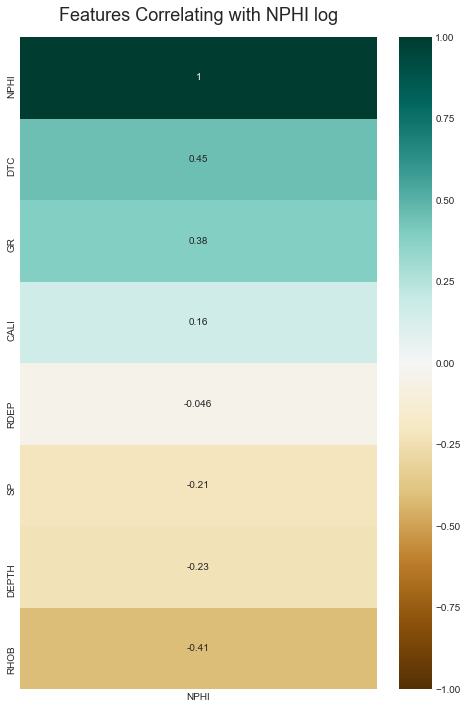

In [196]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['NPHI']].sort_values(by='NPHI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with NPHI log', fontdict={'fontsize':18}, pad=16)

In [197]:
#drop the missing values of the highly correlated features before prediction
train_data.dropna(subset=['DEPTH','RHOB', 'SP', 'GR',
       'DTC', 'RDEP','CALI'],inplace=True)

train_data.isnull().sum()

CALI         0
DEPTH        0
DTC          0
GR           0
NPHI     27987
RDEP         0
RHOB         0
SP           0
WELL         0
dtype: int64

### Missing values imputation

We can use various ML models to predict NPHI log as countinious regression problem. Here, I will employ Multi-Layer Percepteron Neural Network from scikit-learn to predict target value. I am not going to deep for this approach and use simply to predict missing values.

In [198]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

set_NPHI = train_data[['DEPTH','RHOB', 'DTC','RDEP','SP', 'GR',
       'NPHI','CALI']].dropna()  # select features and target log that has value
X = set_NPHI[['DEPTH','RHOB', 'SP', 'GR',
       'DTC', 'RDEP','CALI']]  # feature selection without null value
XX = train_data[['DEPTH','RHOB', 'SP', 'GR',
       'DTC', 'RDEP','CALI']]
y = set_NPHI['NPHI'] # target log
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_b = scaler.fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
%%time
MLP_pe = MLPRegressor(random_state=42, max_iter= 500).fit(X_train, y_train) #fit the model
MLP_pe.score(X_test, y_test) # examine accuracy

Wall time: 3.52 s


0.9391231816153033

In [201]:
train_data['NPHI_pred'] = MLP_pe.predict(X_b)
train_data['NPHI'].fillna(train_data['NPHI_pred'], inplace =True) 

In [202]:
train_data.isnull().sum()

CALI         0
DEPTH        0
DTC          0
GR           0
NPHI         0
RDEP         0
RHOB         0
SP           0
WELL         0
NPHI_pred    0
dtype: int64

In [203]:
train_data.drop('NPHI_pred',axis=1,inplace=True)

### Outlier removal

In [204]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = train_data.copy()

# on the well_train_drop, drop WELL and DEPTH column
#well_train_drop = well_train_drop.drop(['WELL'], axis=1)

In [207]:
from sklearn.ensemble import IsolationForest

def outlier_removal(df, ind=-1):

    log_header = ['DEPTH','WELL','CALI','DTC', 'GR', 'NPHI', 'RDEP', 'RHOB', 'SP']
    print('Before anomaly treatment\n',df.drop(['WELL', 'DEPTH'], axis=1).describe())
    # major parameter percentage of outlier present with parameter contamination, nu : 3 %
    outliers_frac = 0.03
    # define outlier/anomaly detection methods to be compared
    anomaly_algorithm = [('Isolation Forest', IsolationForest(n_estimators=100, max_samples='auto',
                         contamination=outliers_frac, random_state=42))]
        
    fig = plt.figure(figsize=(15, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.6)
    fig.suptitle('Anomaly detection using Isolation Forest')

# detect anomaly for each features
    for i, item in enumerate(log_header[2:]):
        temp = 171+i  # this is to index the position of the subplot
        plt.subplot(temp)
        # Automatic anomaly flagging on whole data sample with inliers labeled as 1 and outliers labeled as -1
        anomaly = anomaly_algorithm[0][1].fit_predict(df[[item]])
        plt.scatter(df[item], df.DEPTH, label='original', marker='o',s=4)
        plt.scatter(df[item][anomaly==-1], df.DEPTH[anomaly==-1],
                        marker='^', label='outliers',s=4)
        plt.xlabel(item)
        plt.ylabel('DEPTH')
        plt.gca().invert_yaxis()
        plt.legend(loc='upper right')
 
        print('\nNumber of anomalies detected for', item, '=', -sum(anomaly[anomaly==-1]),'out of', anomaly.shape[0])
        counter = np.zeros(df.shape[0])
        counter += anomaly

        df = df[anomaly==1]
        print('Number of data points after anomalies removal =',df.shape[0])
    
    print('After anomaly treatment\n',df.drop(['WELL', 'DEPTH'], axis=1).describe())
    return df


        



Before anomaly treatment
                 CALI            DTC             GR           NPHI  \
count  106375.000000  106375.000000  106375.000000  106375.000000   
mean       13.567811     119.050437      50.615798       0.278323   
std         3.353561      31.042574      27.143233       0.176091   
min         5.828000      38.432194       3.412000      -0.055290   
25%        11.727000      90.212868      29.833608       0.128369   
50%        13.275999     132.071381      51.438000       0.299765   
75%        15.967000     144.633934      65.875866       0.443591   
max        29.145000     194.164474     323.898987       0.954500   

                RDEP           RHOB             SP  
count  106375.000000  106375.000000  106375.000000  
mean        0.140100       2.189165      50.491543  
std         0.377736       0.222474      24.496793  
min        -0.645892       1.018344     -73.297897  
25%        -0.117475       2.041642      35.195000  
50%         0.088853       2.13800

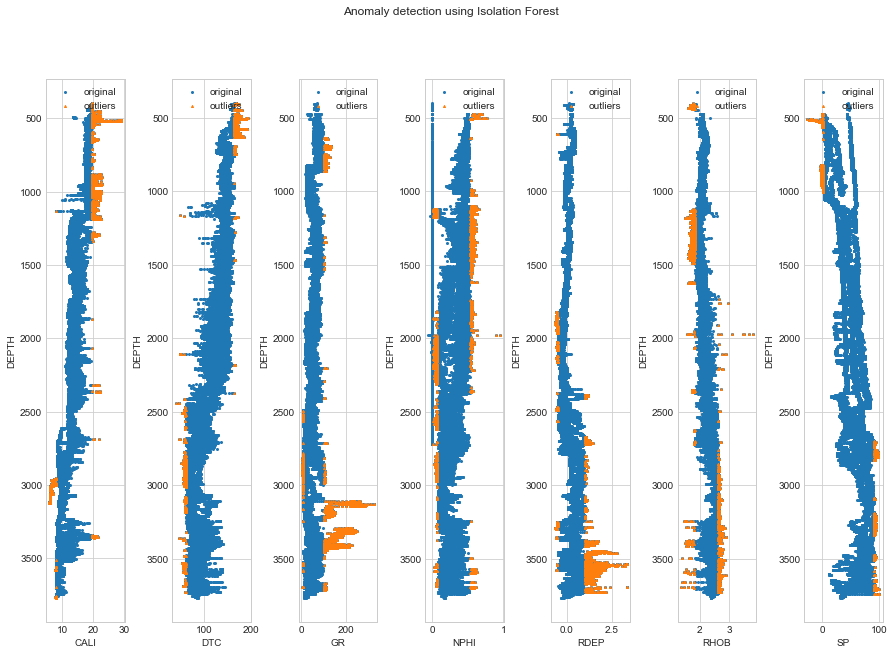

In [208]:
data = outlier_removal(well_train_drop, ind=-1)

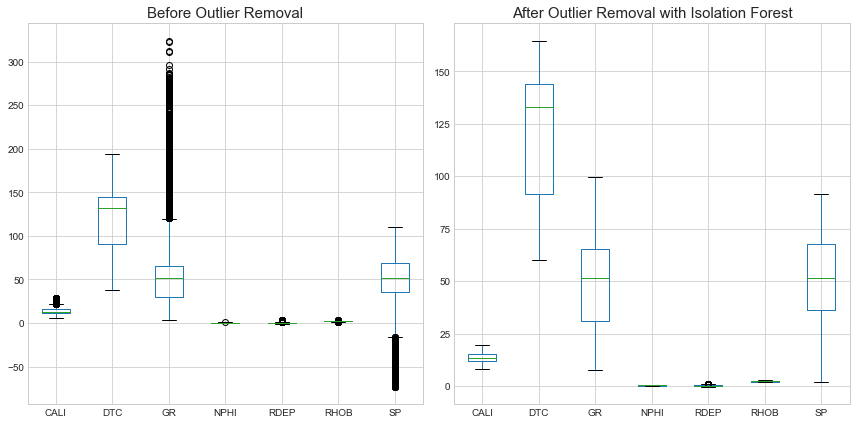

In [209]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
train_data[log_header[2:]].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(1,2,2)
data[log_header[2:]].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.tight_layout()
plt.show()

In [210]:
data.isnull().sum()

CALI     0
DEPTH    0
DTC      0
GR       0
NPHI     0
RDEP     0
RHOB     0
SP       0
WELL     0
dtype: int64

In [211]:
data.head()

,CALI,DEPTH,DTC,GR,NPHI,RDEP,RHOB,SP,WELL
260,17.875000,533.117126,160.908279,65.315254,0.483348,0.246011,2.047,1.995898,15/9-12
261,17.813000,533.269531,160.187958,67.185974,0.484852,0.250181,2.045,2.741137,15/9-12
262,17.938000,533.421936,160.041489,65.497032,0.487519,0.253092,2.025,2.202385,15/9-12
278,17.983999,535.860352,160.842285,74.933800,0.490106,0.241281,2.045,2.059240,15/9-12
279,18.063000,536.012756,160.220825,72.307899,0.485749,0.230687,2.047,2.831186,15/9-12


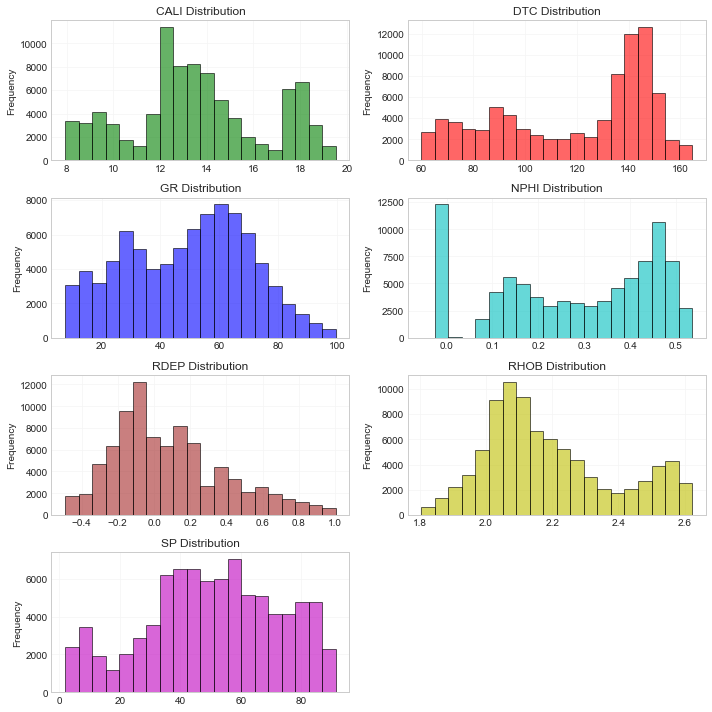

In [212]:
#Setup the number of rows and columns for our plot
rows = 4
cols = 2
colors = ['g','r','b','c','brown','y','m','grey','purple']
fig=plt.figure(figsize=(10,10))

for i, feature in enumerate(data.drop(['DEPTH','WELL'],axis=1)):
    ax=fig.add_subplot(rows,cols,i+1)
    data[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

Add new feature shale volume

In [213]:
def shale_volume(gamma_ray, gamma_ray_max, gamma_ray_min):
    vshale = (gamma_ray - gamma_ray_min) / (gamma_ray_max - gamma_ray_min)
    return round(vshale, 4)

In [214]:
#Calculate Shale Volume
data['VSHALE'] = shale_volume(data['GR'], data['GR'].quantile(q=0.99),
                             data['GR'].quantile(q=0.01))

In [215]:
features = [feat for feat in data.columns]
print(features)

['CALI', 'DEPTH', 'DTC', 'GR', 'NPHI', 'RDEP', 'RHOB', 'SP', 'WELL', 'VSHALE']


Text(0.5, 1.0, 'Features Correlating with DTC log')

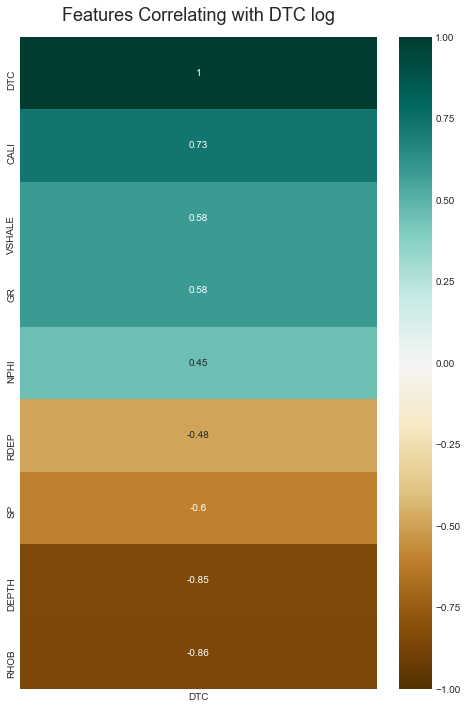

In [216]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['DTC']].sort_values(by='DTC', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with DTC log', fontdict={'fontsize':18}, pad=16)

In [217]:
data['WELL'].unique()

array(['15/9-12', '15/9-17', '15/9-18', '15/9-7', '15/9-8'], dtype=object)

In [218]:
test_data['WELL'].unique()

array(['15/9-13', '15/9-15'], dtype=object)

In [175]:
#data.to_csv('training_data.csv')
#test_data.to_csv('blind.csv')